In [252]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [253]:
img_in = cv2.imread(
    "/home/xyhang/projects/VCIP2023-grand-challenge/images/6720x4480/IMG_6726.png"
)

img_qarv = cv2.imread(
    "results/quality-0.5/IMG_6726_rec.bmp"
)

img_ours_slow = cv2.imread("PSNR/speedup-0.98/qscale-0.5/IMG_6726_rec.bmp")
img_ours_fast = cv2.imread("PSNR/speedup-2.0/qscale-0.5/IMG_6726_rec.bmp")

libpng warning: iCCP: known incorrect sRGB profile


In [254]:
import numpy as np

qarv_diff = np.abs(img_in.astype(np.float32) - img_qarv.astype(np.float32))
ours_slow_diff = np.abs(img_in.astype(np.float32) - img_ours_slow.astype(np.float32))
ours_fast_diff = np.abs(img_in.astype(np.float32) - img_ours_fast.astype(np.float32))

In [269]:
np.log10(np.mean(qarv_diff ** 2 / 255 ** 2))

-3.7804973

In [255]:
from matplotlib import axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

def matshow_diff(mat):
    # mat = cv2.GaussianBlur(mat, (51, 51), 1.0)
    fig, ax = plt.subplots()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    mat = mat.mean(axis=2) / 255.0
    print(mat.min(), mat.max())
    im = ax.imshow(mat, cmap="Greys", vmax=0.05)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Add the colorbar
    cbar = fig.colorbar(im, cax=cax)

0.0 0.11895425


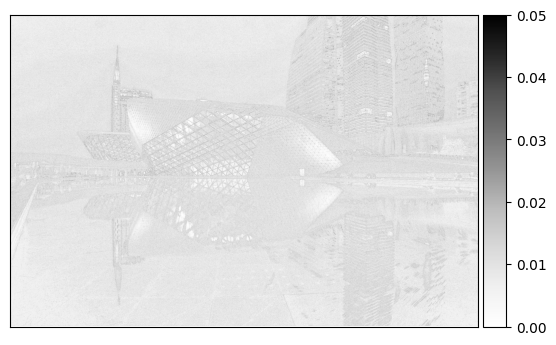

In [270]:
matshow_diff(qarv_diff)
plt.savefig('output/qarv_diff.png', dpi=600, bbox_inches='tight')

0.0 0.19607843


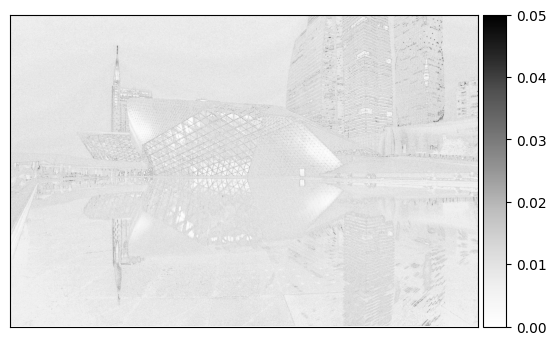

In [271]:
matshow_diff(ours_fast_diff)
plt.savefig("output/ours_fast_diff.png", dpi=600, bbox_inches="tight")

0.0 0.12287582


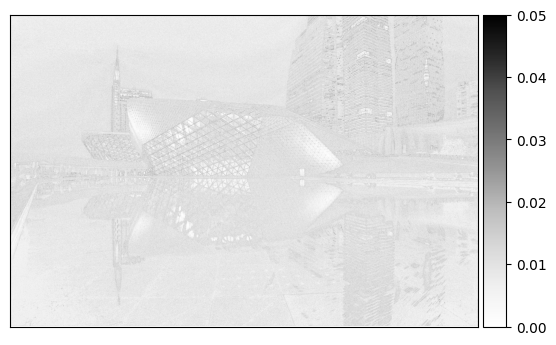

In [272]:
matshow_diff(ours_slow_diff)
plt.savefig("output/ours_slow_diff.png", dpi=600, bbox_inches="tight")

In [259]:
ourdiff_fast = (ours_fast_diff - qarv_diff) / 255.0

In [260]:
ourdiff_slow = (ours_slow_diff - qarv_diff) / 255.0

In [287]:
def matshow2(mat):
    mat = cv2.GaussianBlur(mat, (71, 71), 0)
    fig, ax = plt.subplots()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    mat = mat.mean(axis=2)
    im = ax.imshow(
        mat,
        cmap="bwr",
        vmin=-0.01,
        vmax=0.01,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Add the colorbar
    cbar = fig.colorbar(im, cax=cax)

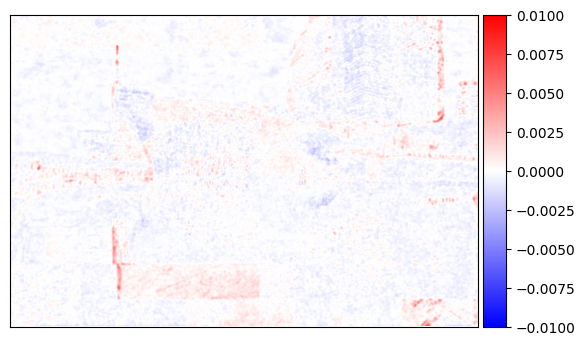

In [288]:
matshow2(ourdiff_fast)
plt.savefig("output/ours_fast_delta.png", dpi=600, bbox_inches="tight")

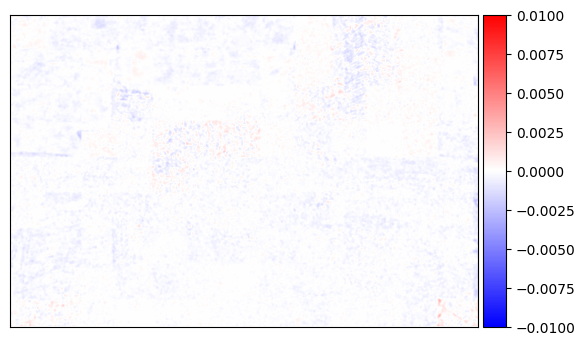

In [289]:
matshow2(ourdiff_slow)
plt.savefig("output/ours_slow_delta.png", dpi=600, bbox_inches="tight")

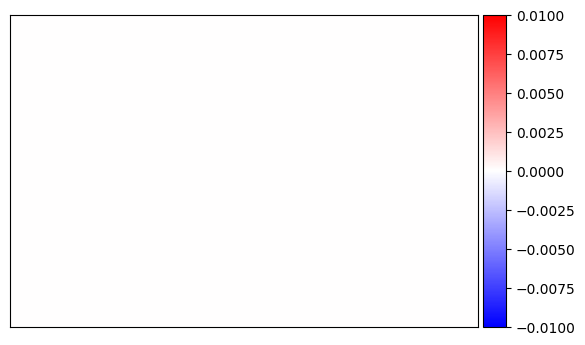

In [291]:
matshow2(np.zeros_like(ours_fast_diff))
plt.savefig("output/empty_delta.png", dpi=600, bbox_inches="tight")